# Collecting Data from Reddit via PRAW

In this tutorial, we'll explore how to use PRAW (Python Reddit API Wrapper) to collect data from Reddit. We'll cover different functionalities of the Reddit API, including fetching posts, comments, submitting new posts, voting, and more. Throughout the tutorial, we'll use a real-life example by collecting data from the subreddit r/worldnews.

You can install PRAW using pip, the Python package manager:

In [1]:
!pip install praw

In [2]:
import praw

## Authenticating with Reddit API

To use the Reddit API, you need to authenticate with Reddit's servers. You can create a Reddit application on Reddit's website and obtain your client ID, client secret, and user agent.

In [3]:
reddit = praw.Reddit(client_id='your_client_id',
                     client_secret='your_client_secret',
                     user_agent='your_user_agent')

reddit = praw.Reddit(
    client_id="eFWNz4m5U0i02Fl9zss-Vg",
    client_secret="NjPXd3HOKBPHrE3Snslh7G55pE_EQw",
    user_agent="myApp for data analysis"
)

## Fetching Posts

You can fetch posts from Reddit using PRAW. For example, to fetch the top posts from a subreddit:

In [4]:
subreddit = reddit.subreddit('worldnews')
top_posts = list(subreddit.top(limit=5)) # convert the generator to list

for post in top_posts:
    print(post.title)

An anti-gay Hungarian politician has resigned after being caught by police fleeing a 25-man orgy through a window
Trump Impeached for Abuse of Power
Vladimir Putin's black belt revoked by international taekwondo organization
Two weeks before his inauguration, Donald J. Trump was shown highly classified intelligence indicating that President Vladimir V. Putin of Russia had personally ordered complex cyberattacks to sway the 2016 American election
Queen Elizabeth II has died, Buckingham Palace announces


In [5]:
vars(top_posts[0])

{'comment_limit': 2048,
 'comment_sort': 'confidence',
 '_reddit': <praw.reddit.Reddit at 0x24f62c3bf10>,
 'approved_at_utc': None,
 'subreddit': Subreddit(display_name='worldnews'),
 'selftext': '',
 'author_fullname': 't2_2brvvn9o',
 'saved': False,
 'mod_reason_title': None,
 'gilded': 2,
 'clicked': False,
 'title': 'An anti-gay Hungarian politician has resigned after being caught by police fleeing a 25-man orgy through a window',
 'link_flair_richtext': [],
 'subreddit_name_prefixed': 'r/worldnews',
 'hidden': False,
 'pwls': 7,
 'link_flair_css_class': None,
 'downs': 0,
 'thumbnail_height': 70,
 'top_awarded_type': None,
 'hide_score': False,
 'name': 't3_k4qide',
 'quarantine': False,
 'link_flair_text_color': 'dark',
 'upvote_ratio': 0.93,
 'author_flair_background_color': None,
 'subreddit_type': 'public',
 'ups': 204538,
 'total_awards_received': 0,
 'media_embed': {},
 'thumbnail_width': 140,
 'author_flair_template_id': None,
 'is_original_content': False,
 'user_reports':

### which attributes do posts have?

You can find all attributes here: https://praw.readthedocs.io/en/stable/code_overview/models/submission.html

In [6]:
top_posts[0]

Submission(id='k4qide')

In [7]:
top_posts[0].selftext

''

In [8]:
top_posts[0].num_comments

8401

In [9]:
top_posts[0].score

204538

## Searching for Posts

You can search for posts using specific keywords:

In [10]:
python_posts = list(reddit.subreddit('worldnews').search('COVID-19', limit=20))

for post in python_posts:
    print(post.title)

WHO says COVID-19 is still a global health emergency
Prime Minister Trudeau tests positive for COVID-19
First patient receives Pfizer Covid-19 vaccine
Prince Charles resulted positive to Covid-19
Austria makes COVID-19 vaccination mandatory starting February.
Covid-19 vaccine candidate is 90% effective, says manufacturer
Singapore vaccinates 80 percent of population against COVID-19
Chinese wet markets still operating despite COVID-19
Bolsonaro experiencing Covid-19 symptoms, says CNN Brazil
Pope's personal doctor dies from Covid-19 complications
China admits COVID-19 situation ‘grim and complex’
Israel Finds COVID-19 Vaccine Booster Significantly Lowers Infection Risk
48 people catch COVID-19 aboard Royal Caribbean cruise
England's COVID-19 infections down 30% during national lockdown: survey
Olympics bans spectators after Tokyo declares COVID-19 emergency
Coronavirus: Trump declares national emergency in US over COVID-19
Livethread: Global COVID-19 Pandemic
Spain 'to register' those 

## Fetch comments from a subreddit post

In [11]:
link = python_posts[0].permalink
link

'/r/worldnews/comments/y85hsb/who_says_covid19_is_still_a_global_health/'

In [12]:
submission = reddit.submission(url='https://www.reddit.com' + link)
submission.comments.replace_more(limit=5)  # Replace MoreComments objects with their children
for comment in submission.comments.list():
    print(comment.body)

Thanks, I nearly felt my cortisol levels to drop.
As someone who got covid today, it still fucking sucks.

Edit: day 3 and it is still kicking my ass.
My boss was the one on a soap box telling all of us the vaccines are shady and the virus is fake.  He was induced to coma and cant work anymore.  Was getting better and supposed to come back this week.  Apparently he has double pneumonia because his kid brought some “crud” home from school.  He is barely recognizable.  It sucked the life right out of him and he still denies covid is real.
I'm a disabled 50 year old man, and I've got long term issues from COVID on top of my birth disabilities. I feel so sorry for all the young people here in the comments that have been greatly affected by the long term effects from COVID. 

It's a different world now in regards to getting help from social services in whatever country you are all living in. And yet people will still mock us for being sick.
I am no longer able to think clearly and have been

## Fetch information about subreddit posts

In [13]:
subreddit = reddit.subreddit('worldnews')
for post in subreddit.hot(limit=5):  # Fetch 5 hot posts from the subreddit
    print("Title:", post.title)
    print("Score:", post.score)
    print("Number of Comments:", post.num_comments)
    print("URL:", post.url)
    print("Author:", post.author)
    print("-" * 50)

Title: /r/WorldNews Live Thread: Russian Invasion of Ukraine Day 733, Part 1 (Thread #879)
Score: 700
Number of Comments: 130
URL: https://www.reddit.com/live/18hnzysb1elcs
Author: WorldNewsMods
--------------------------------------------------
Title: /r/WorldNews Live Thread for Israel-Hamas War (Thread 46)
Score: 392
Number of Comments: 2904
URL: https://www.reddit.com/live/1bsso361afr0r
Author: WorldNewsMods
--------------------------------------------------
Title: Palestinian Prime Minister Submits Resignation to President Abbas
Score: 2819
Number of Comments: 250
URL: https://www.usnews.com/news/world/articles/2024-02-26/palestinian-prime-minister-submits-resignation-to-president-abbas
Author: DanDan1993
--------------------------------------------------
Title: Sell homes of 'Putin cronies', says London mayor
Score: 9914
Number of Comments: 281
URL: https://www.bbc.com/news/uk-england-london-68396546
Author: 4920185
--------------------------------------------------
Title: Denmar

## Fetch details about a Reddit user

In [14]:
redditor = reddit.redditor('ExactlySorta')  # Replace 'spez' with the username of the user you want to fetch details for
print("Username:", redditor.name)
print("Cake Day:", redditor.created_utc)
print("Comment Karma:", redditor.comment_karma)
print("Link Karma:", redditor.link_karma)

Username: ExactlySorta
Cake Day: 1581102631.0
Comment Karma: 264611
Link Karma: 1844644


### Visualizing number of posts over time

In [39]:
covid_posts = list(reddit.subreddit('worldnews').search('COVID-19', limit=1000))
python_posts = list(reddit.subreddit('worldnews').search('python', limit=1000))

In [40]:
len(covid_posts), len(python_posts)

(233, 130)

In [41]:
python_posts[-1].selftext

''

In [42]:
vars(python_posts[-1])

{'comment_limit': 2048,
 'comment_sort': 'confidence',
 '_reddit': <praw.reddit.Reddit at 0x24f62c3bf10>,
 'approved_at_utc': None,
 'subreddit': Subreddit(display_name='worldnews'),
 'selftext': '',
 'author_fullname': 't2_tfz7j',
 'saved': False,
 'mod_reason_title': None,
 'gilded': 0,
 'clicked': False,
 'title': 'Huge ice crack in Antarctica forces British scientists to flee research station',
 'link_flair_richtext': [],
 'subreddit_name_prefixed': 'r/worldnews',
 'hidden': False,
 'pwls': 7,
 'link_flair_css_class': None,
 'downs': 0,
 'thumbnail_height': 73,
 'top_awarded_type': None,
 'hide_score': False,
 'name': 't3_5os5no',
 'quarantine': False,
 'link_flair_text_color': 'dark',
 'upvote_ratio': 0.9,
 'author_flair_background_color': None,
 'subreddit_type': 'public',
 'ups': 805,
 'total_awards_received': 0,
 'media_embed': {},
 'thumbnail_width': 140,
 'author_flair_template_id': None,
 'is_original_content': False,
 'user_reports': [],
 'secure_media': None,
 'is_reddit_m

let's put some of this information into dataframe formats

In [43]:
import pandas as pd

In [44]:
def post_to_df(posts):
    posts_for_df = []
    for post in posts:
        posts_for_df.append(vars(post))
    return pd.DataFrame(posts_for_df)

In [45]:
python_df = post_to_df(python_posts)
covid_df = post_to_df(covid_posts)
python_df

,comment_limit,comment_sort,_reddit,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,gilded,...,created_utc,num_crossposts,media,is_video,_fetched,_additional_fetch_params,_comments_by_id,post_hint,preview,author_cakeday
0,2048,confidence,<praw.reddit.Reddit object at 0x0000024F62C3BF10>,None,worldnews,,t2_4buao,False,None,0,...,1.384952e+09,0,None,False,False,{},{},NaN,NaN,NaN
1,2048,confidence,<praw.reddit.Reddit object at 0x0000024F62C3BF10>,None,worldnews,,t2_14jan,False,None,0,...,1.375877e+09,0,None,False,False,{},{},link,{'images': [{'source': {'url': 'https://extern...,NaN
2,2048,confidence,<praw.reddit.Reddit object at 0x0000024F62C3BF10>,None,worldnews,,t2_8vre6,False,None,0,...,1.382194e+09,0,None,False,False,{},{},link,{'images': [{'source': {'url': 'https://extern...,NaN
3,2048,confidence,<praw.reddit.Reddit object at 0x0000024F62C3BF10>,None,worldnews,,t2_3ayef,False,None,0,...,1.375731e+09,0,None,False,False,{},{},link,{'images': [{'source': {'url': 'https://extern...,NaN
4,2048,confidence,<praw.reddit.Reddit object at 0x0000024F62C3BF10>,None,worldnews,,t2_pfn1,False,None,0,...,1.359320e+09,0,None,False,False,{},{},link,{'images': [{'source': {'url': 'https://extern...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,2048,confidence,<praw.reddit.Reddit object at 0x0000024F62C3BF10>,None,worldnews,,t2_cwuqa,False,None,0,...,1.378578e+09,0,None,False,False,{},{},link,{'images': [{'source': {'url': 'https://extern...,NaN
126,2048,confidence,<praw.reddit.Reddit object at 0x0000024F62C3BF10>,None,worldnews,,t2_z5zfah7,False,None,0,...,1.646771e+09,0,None,False,False,{},{},link,{'images': [{'source': {'url': 'https://extern...,NaN
127,2048,confidence,<praw.reddit.Reddit object at 0x0000024F62C3BF10>,None,worldnews,,t2_f5gipm1,False,None,0,...,1.596799e+09,0,None,False,False,{},{},link,{'images': [{'source': {'url': 'https://extern...,NaN
128,2048,confidence,<praw.reddit.Reddit object at 0x0000024F62C3BF10>,None,worldnews,,t2_2tm4uvwf,False,None,0,...,1.553633e+09,2,None,False,False,{},{},link,{'images': [{'source': {'url': 'https://extern...,NaN


In [47]:
# let's take a subset of columns
python_df[['subreddit', 'title', 'selftext', 'created_utc']]

,subreddit,title,selftext,created_utc
0,worldnews,Monty Python to reunite for new show after 30 ...,,1.384952e+09
1,worldnews,"Python That Killed Boys Was House Pet: ""The py...",,1.375877e+09
2,worldnews,The British public has such “poor religious li...,,1.382194e+09
3,worldnews,"Python escapes Canadian pet store, strangles t...",,1.375731e+09
4,worldnews,Want to become a British citizen? Better swot ...,,1.359320e+09
...,...,...,...,...
125,worldnews,Japanese professor pushes for Hide and Seek at...,,1.378578e+09
126,worldnews,Former Astronaut Scott Kelly Tells Russian Spa...,,1.646771e+09
127,worldnews,About 27 human genes have been renamed in the ...,,1.596799e+09
128,worldnews,"China is spying on Israel to steal US secrets,...",,1.553633e+09


In [48]:
python_posts[0].created_utc

1384951955.0

this is a UNIX timestamp: https://www.unixtimestamp.com/

In [50]:
# let's concatenate these two dataframes vertically

reddit_df = pd.concat([python_df, covid_df], axis = 0).reset_index()
reddit_df

,index,comment_limit,comment_sort,_reddit,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,...,num_crossposts,media,is_video,_fetched,_additional_fetch_params,_comments_by_id,post_hint,preview,author_cakeday,link_flair_template_id
0,0,2048,confidence,<praw.reddit.Reddit object at 0x0000024F62C3BF10>,None,worldnews,,t2_4buao,False,None,...,0,None,False,False,{},{},NaN,NaN,NaN,NaN
1,1,2048,confidence,<praw.reddit.Reddit object at 0x0000024F62C3BF10>,None,worldnews,,t2_14jan,False,None,...,0,None,False,False,{},{},link,{'images': [{'source': {'url': 'https://extern...,NaN,NaN
2,2,2048,confidence,<praw.reddit.Reddit object at 0x0000024F62C3BF10>,None,worldnews,,t2_8vre6,False,None,...,0,None,False,False,{},{},link,{'images': [{'source': {'url': 'https://extern...,NaN,NaN
3,3,2048,confidence,<praw.reddit.Reddit object at 0x0000024F62C3BF10>,None,worldnews,,t2_3ayef,False,None,...,0,None,False,False,{},{},link,{'images': [{'source': {'url': 'https://extern...,NaN,NaN
4,4,2048,confidence,<praw.reddit.Reddit object at 0x0000024F62C3BF10>,None,worldnews,,t2_pfn1,False,None,...,0,None,False,False,{},{},link,{'images': [{'source': {'url': 'https://extern...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,228,2048,confidence,<praw.reddit.Reddit object at 0x0000024F62C3BF10>,None,worldnews,,t2_kahpaja,False,None,...,5,None,False,False,{},{},link,{'images': [{'source': {'url': 'https://extern...,NaN,NaN
359,229,2048,confidence,<praw.reddit.Reddit object at 0x0000024F62C3BF10>,None,worldnews,,t2_c6x1mt59,False,None,...,3,None,False,False,{},{},link,{'images': [{'source': {'url': 'https://extern...,NaN,NaN
360,230,2048,confidence,<praw.reddit.Reddit object at 0x0000024F62C3BF10>,None,worldnews,,t2_4g3lx,False,None,...,1,None,False,False,{},{},link,{'images': [{'source': {'url': 'https://extern...,NaN,NaN
361,231,2048,confidence,<praw.reddit.Reddit object at 0x0000024F62C3BF10>,None,worldnews,,t2_dzuby6jj,False,None,...,2,None,False,False,{},{},link,{'images': [{'source': {'url': 'https://extern...,NaN,NaN


In [51]:
len(python_df) + len(covid_df)

363

Let's try to convert this to a human-interpretable time and date

In [53]:
# to make interpreting the date easier, let's convert it to human-readable form

reddit_df['created'] = pd.to_datetime(reddit_df['created_utc'], utc=True, unit='s')
reddit_df[['subreddit', 'title', 'selftext', 'created_utc', 'created']]

,subreddit,title,selftext,created_utc,created
0,worldnews,Monty Python to reunite for new show after 30 ...,,1.384952e+09,2013-11-20 12:52:35+00:00
1,worldnews,"Python That Killed Boys Was House Pet: ""The py...",,1.375877e+09,2013-08-07 12:01:04+00:00
2,worldnews,The British public has such “poor religious li...,,1.382194e+09,2013-10-19 14:45:24+00:00
3,worldnews,"Python escapes Canadian pet store, strangles t...",,1.375731e+09,2013-08-05 19:27:53+00:00
4,worldnews,Want to become a British citizen? Better swot ...,,1.359320e+09,2013-01-27 20:56:29+00:00
...,...,...,...,...,...
358,worldnews,Two men killed on rural Alberta road were hunt...,,1.585664e+09,2020-03-31 14:18:39+00:00
359,worldnews,Cuba encouraged by early efficacy results of h...,,1.624206e+09,2021-06-20 16:12:25+00:00
360,worldnews,England will now require international arrival...,,1.610108e+09,2021-01-08 12:14:22+00:00
361,worldnews,"China locks down Yuzhou, city of 1.2 million, ...",,1.641282e+09,2022-01-04 07:42:38+00:00


let's aggregate the posts on a monthly basis

In [63]:
reddit_time_df = reddit_df.set_index('created')

post_counts = reddit_time_df.resample('M').size()

In [64]:
post_counts

created
2008-04-30 00:00:00+00:00    2
2008-05-31 00:00:00+00:00    0
2008-06-30 00:00:00+00:00    0
2008-07-31 00:00:00+00:00    0
2008-08-31 00:00:00+00:00    1
                            ..
2023-09-30 00:00:00+00:00    0
2023-10-31 00:00:00+00:00    1
2023-11-30 00:00:00+00:00    0
2023-12-31 00:00:00+00:00    1
2024-01-31 00:00:00+00:00    1
Freq: M, Length: 190, dtype: int64

let's visualize these two

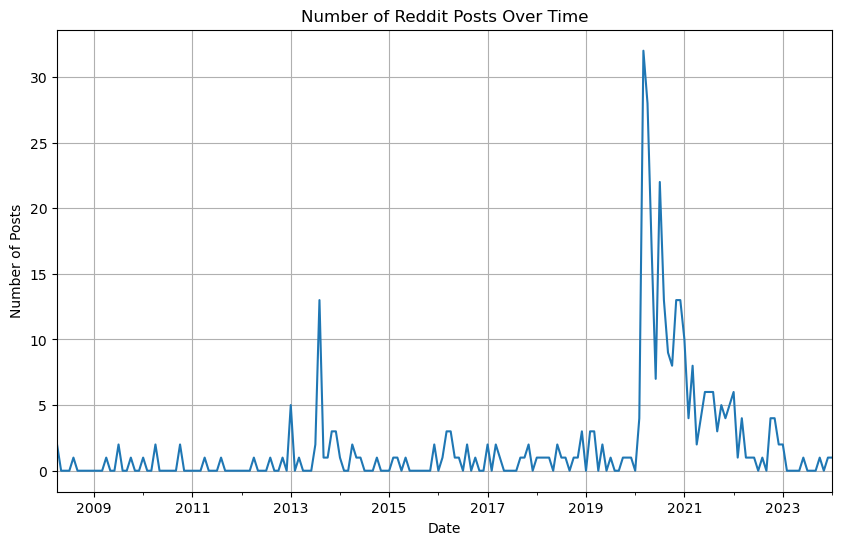

In [65]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
post_counts.plot()
plt.title('Number of Reddit Posts Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.grid(True)
plt.show()

### Ex 1: How do we get two separate lines for the two queries?

In [67]:
python_df['query'] = ['python'] * len(python_df)
covid_df['query'] = ['covid'] * len(covid_df)
reddit_df = pd.concat([python_df, covid_df], axis = 0).reset_index()
reddit_df['created'] = pd.to_datetime(reddit_df['created_utc'], utc=True, unit='s')
reddit_df[['subreddit', 'title', 'selftext', 'created_utc', 'created', 'query']]

,subreddit,title,selftext,created_utc,created,query
0,worldnews,Monty Python to reunite for new show after 30 ...,,1.384952e+09,2013-11-20 12:52:35+00:00,python
1,worldnews,"Python That Killed Boys Was House Pet: ""The py...",,1.375877e+09,2013-08-07 12:01:04+00:00,python
2,worldnews,The British public has such “poor religious li...,,1.382194e+09,2013-10-19 14:45:24+00:00,python
3,worldnews,"Python escapes Canadian pet store, strangles t...",,1.375731e+09,2013-08-05 19:27:53+00:00,python
4,worldnews,Want to become a British citizen? Better swot ...,,1.359320e+09,2013-01-27 20:56:29+00:00,python
...,...,...,...,...,...,...
358,worldnews,Two men killed on rural Alberta road were hunt...,,1.585664e+09,2020-03-31 14:18:39+00:00,covid
359,worldnews,Cuba encouraged by early efficacy results of h...,,1.624206e+09,2021-06-20 16:12:25+00:00,covid
360,worldnews,England will now require international arrival...,,1.610108e+09,2021-01-08 12:14:22+00:00,covid
361,worldnews,"China locks down Yuzhou, city of 1.2 million, ...",,1.641282e+09,2022-01-04 07:42:38+00:00,covid


In [70]:
query_dfs = {}
for name, group in reddit_df.groupby('query'):
    temp_df = group.set_index('created')
    query_dfs[name] = temp_df.resample('M').size()

In [71]:
query_dfs

{'covid': created
 2020-02-29 00:00:00+00:00     2
 2020-03-31 00:00:00+00:00    32
 2020-04-30 00:00:00+00:00    28
 2020-05-31 00:00:00+00:00    16
 2020-06-30 00:00:00+00:00     7
 2020-07-31 00:00:00+00:00    21
 2020-08-31 00:00:00+00:00    12
 2020-09-30 00:00:00+00:00     9
 2020-10-31 00:00:00+00:00     7
 2020-11-30 00:00:00+00:00    13
 2020-12-31 00:00:00+00:00    12
 2021-01-31 00:00:00+00:00     8
 2021-02-28 00:00:00+00:00     4
 2021-03-31 00:00:00+00:00     8
 2021-04-30 00:00:00+00:00     2
 2021-05-31 00:00:00+00:00     3
 2021-06-30 00:00:00+00:00     6
 2021-07-31 00:00:00+00:00     5
 2021-08-31 00:00:00+00:00     6
 2021-09-30 00:00:00+00:00     3
 2021-10-31 00:00:00+00:00     5
 2021-11-30 00:00:00+00:00     3
 2021-12-31 00:00:00+00:00     4
 2022-01-31 00:00:00+00:00     6
 2022-02-28 00:00:00+00:00     1
 2022-03-31 00:00:00+00:00     3
 2022-04-30 00:00:00+00:00     0
 2022-05-31 00:00:00+00:00     0
 2022-06-30 00:00:00+00:00     0
 2022-07-31 00:00:00+00:0

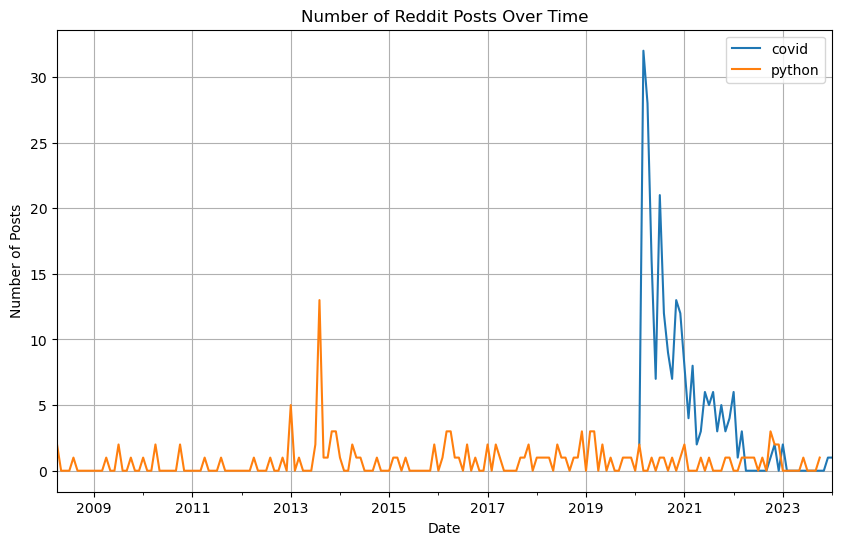

In [72]:
plt.figure(figsize=(10, 6))

for query in query_dfs:
    query_dfs[query].plot(label = query)

plt.title('Number of Reddit Posts Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.grid(True)
plt.legend()
plt.show()